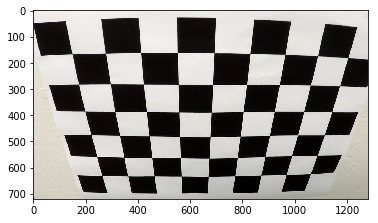

In [227]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('camera_cal/calibration2.jpg')

IMAGE_SHAPE = (720, 1280, 3)

plt.imshow(img)

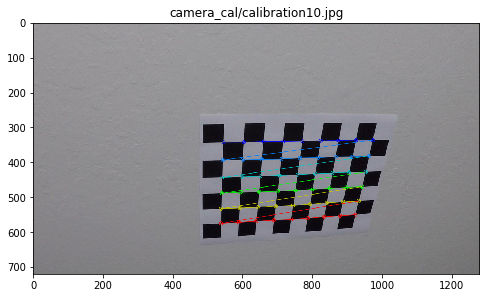

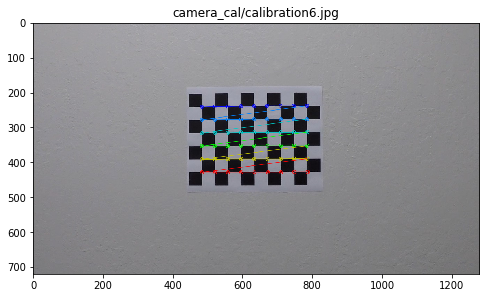

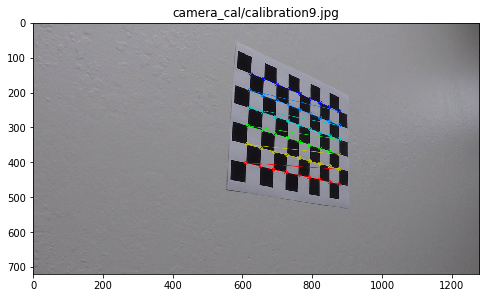

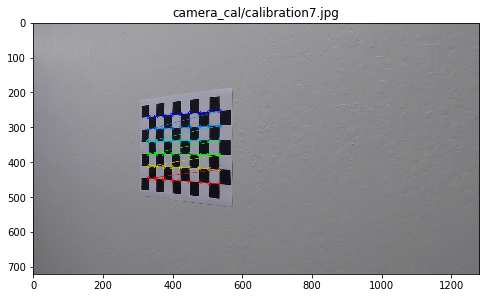

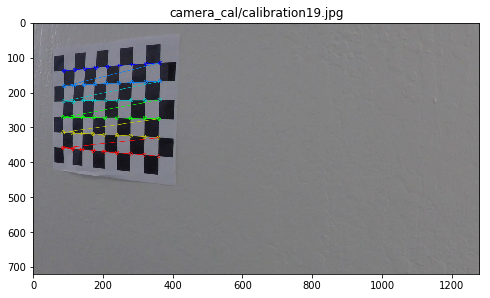

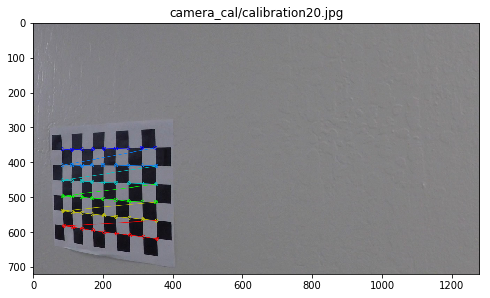

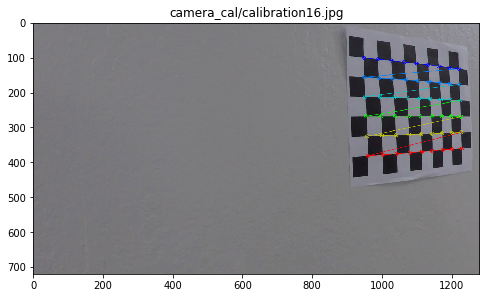

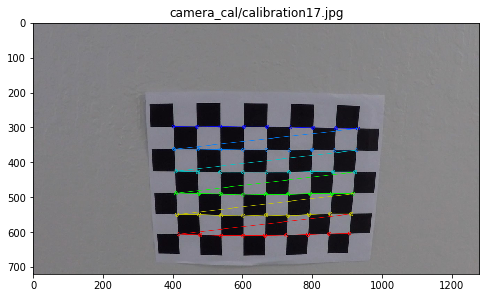

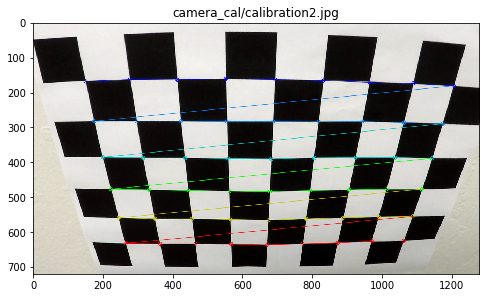

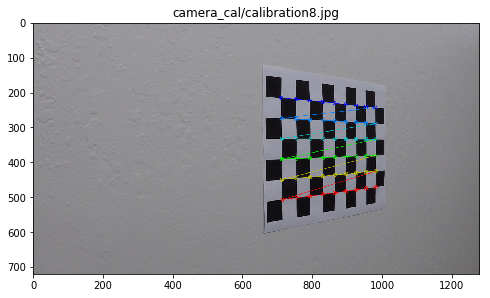

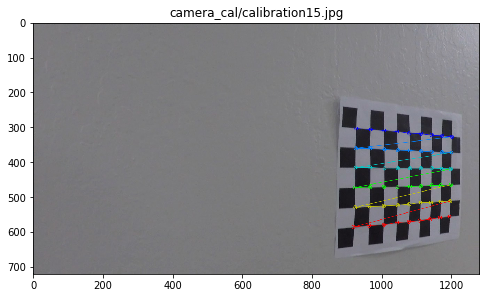

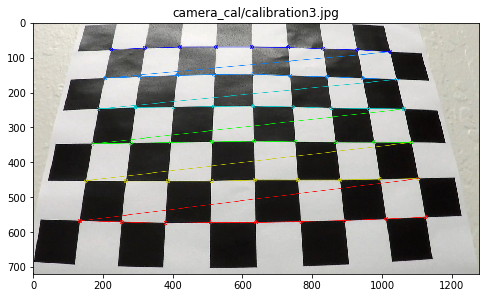

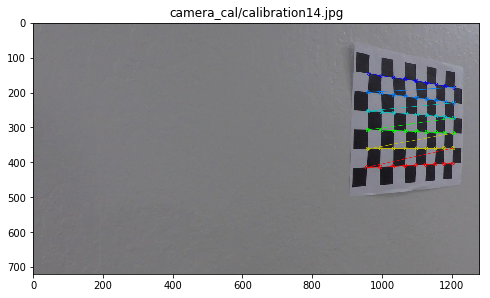

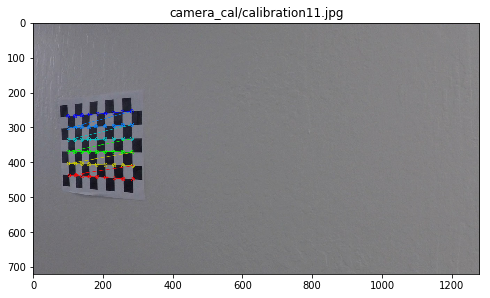

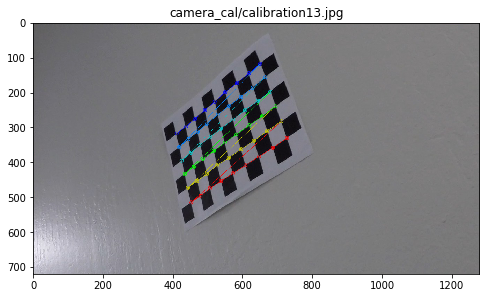

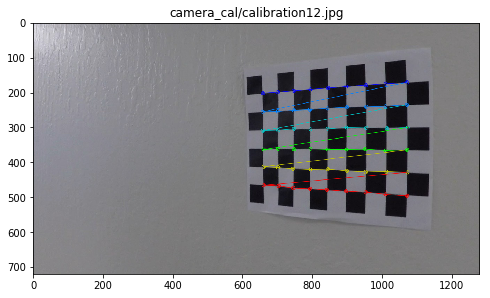

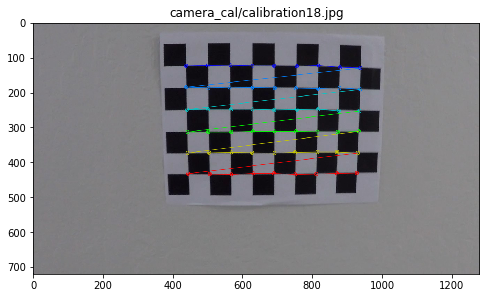

In [228]:
import glob

# chessboard corners counts
nx = 9
ny = 6

images = glob.glob('camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real world space
imgpoints= [] # 2D points in image plane

# Prepare objects points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for fname in images:
    #read in each image
    img = mpimg.imread(fname)
    
    # convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # if corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
        # display corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.figure(figsize=(8,14))
        plt.title(fname)
        plt.imshow(img)

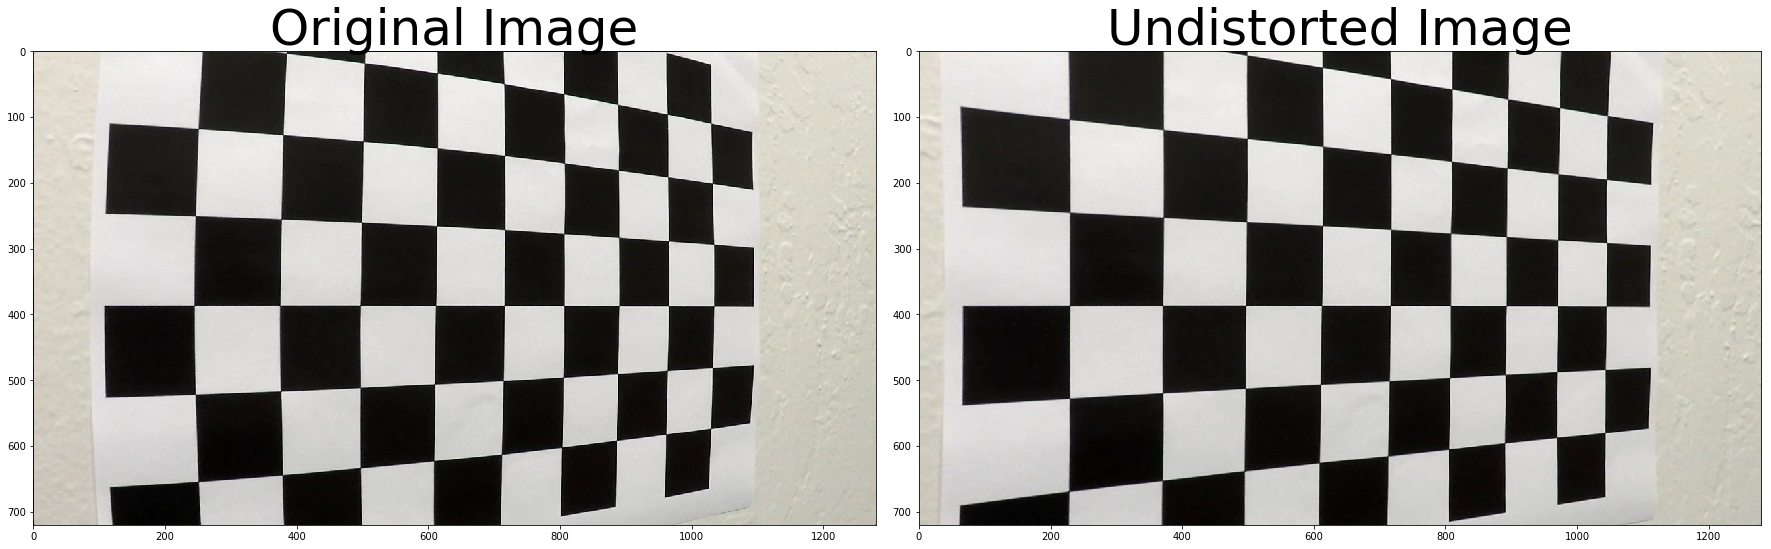

In [229]:
# calibrating camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# fetching sample image for distortion
img_sample = mpimg.imread('camera_cal/calibration5.jpg')

# distorting
img_undist = cv2.undistort(img_sample, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sample)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

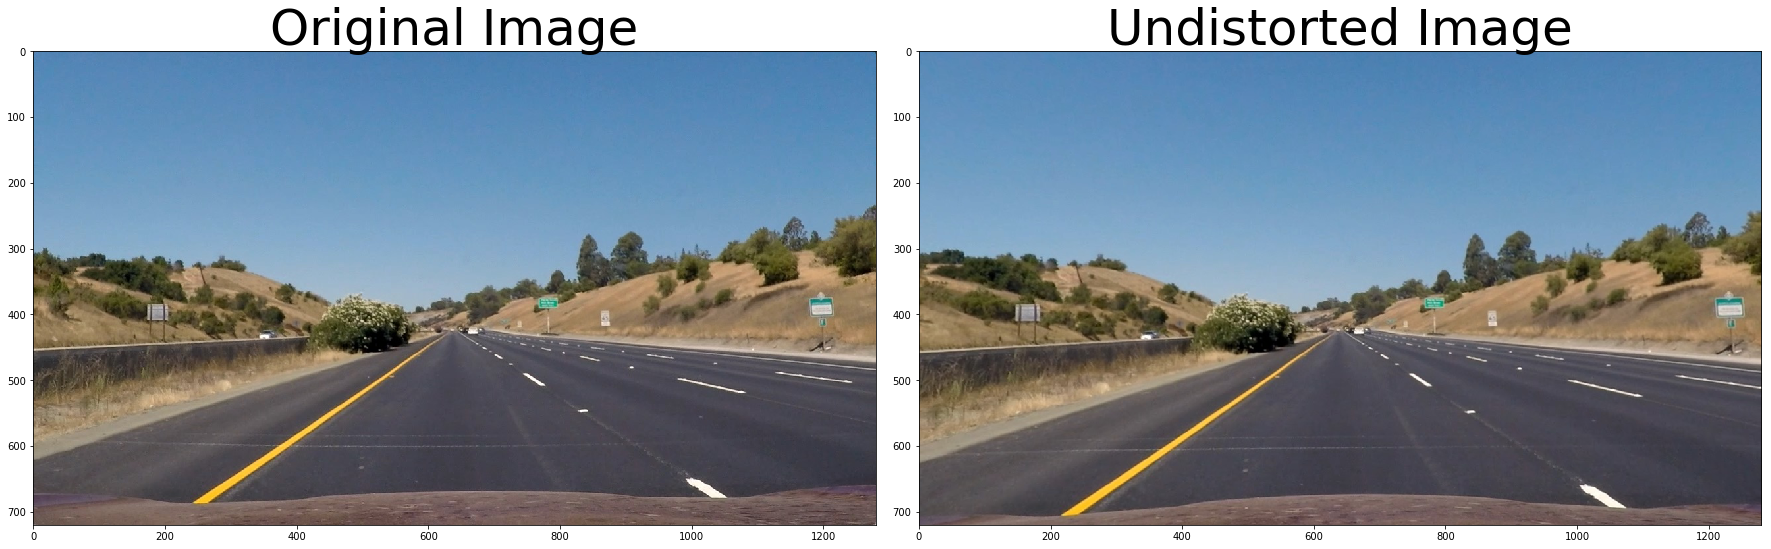

In [230]:
# calibrating camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# fetching sample image for distortion
img_sample = mpimg.imread('test_images/straight_lines1.jpg')

# distorting
img_undist = cv2.undistort(img_sample, mtx, dist, None, mtx)
mpimg.imsave('test_images/straight_lines1_undist.jpg', img_undist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sample)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

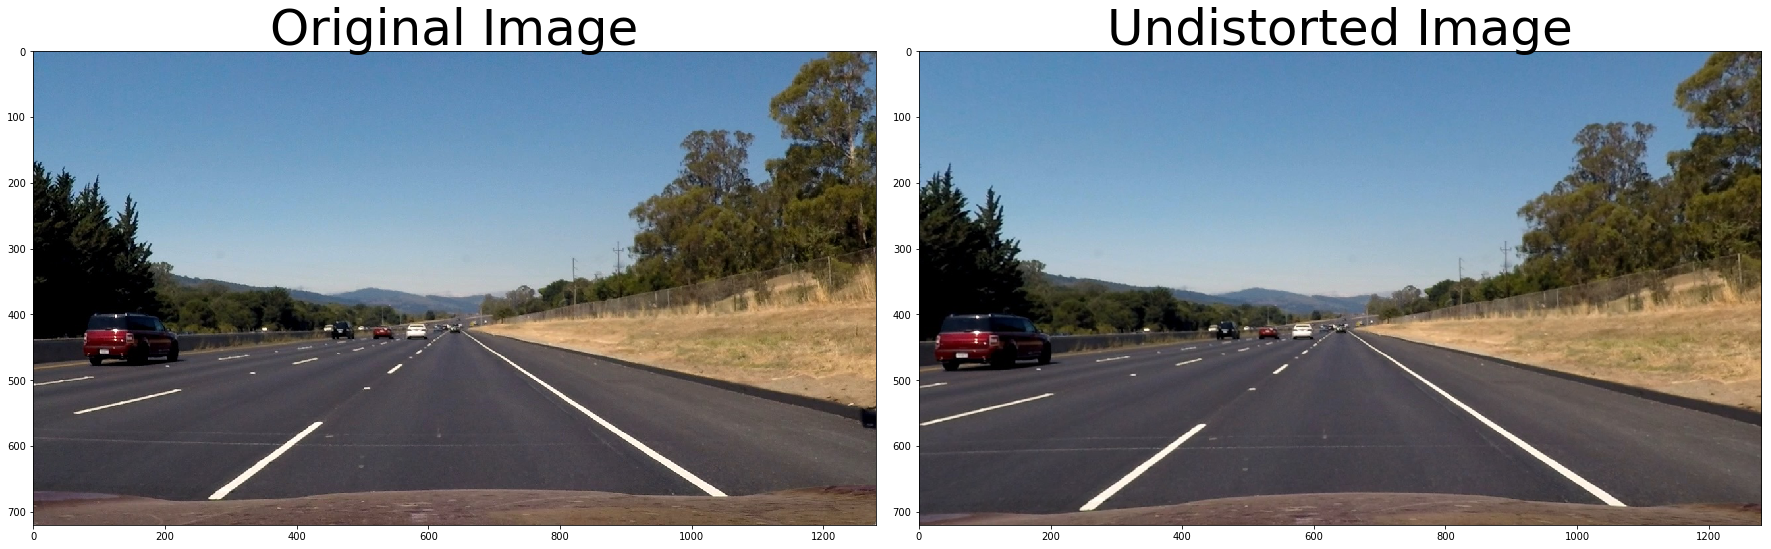

In [231]:
# calibrating camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# fetching sample image for distortion
img_sample = mpimg.imread('test_images/straight_lines2.jpg')

# distorting
img_undist = cv2.undistort(img_sample, mtx, dist, None, mtx)
mpimg.imsave('test_images/straight_lines2_undist.jpg', img_undist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sample)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [232]:
# show an image
def showImg(img, title=None, figsize=(8,14), map=None):
    plt.figure(figsize=figsize)
    if(title is not None):
        plt.title(fname)
    plt.imshow(img, cmap=map)

In [233]:
### image gradients thresholding functions

def getColorChannel(img, channel='gray'):
    ### returns grayscale of particular color channel of an image
    ### img - rgb image
    
    if(channel=='gray'):
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif(channel=='h'):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
        return hls[:,:,0]
    elif(channel=='l'):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
        return hls[:,:,1]
    elif(channel=='s'):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
        return hls[:,:,2]
    elif(channel=='v'):
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
        return hsv[:,:,2]
    elif(channel=='r'):
        return img[:,:,0]
    elif(channel=='g'):
        return img[:,:,1]
    elif(channel=='b'):
        return img[:,:,2]
    
    return None

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255), channel='gray'):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = getColorChannel(img, channel)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255), channel='gray'):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = getColorChannel(img, channel)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_magnitude = np.uint8(255*magnitude/np.max(magnitude))
    # 5) Create a binary mask where mag thresholds are met
    sxbinary = np.zeros_like(scaled_magnitude)
    sxbinary[(scaled_magnitude >= mag_thresh[0]) & (scaled_magnitude <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2), channel='gray'):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = getColorChannel(img, channel)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sxbinary = np.zeros_like(direction)
    sxbinary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary

def color_threshold(img, thresh = (0, 255), channel='gray'):
    
    ### apply color threshold on color channel
    
    # getting grayscale of particular color channel
    gray = getColorChannel(img, channel)
    
    # 2) Apply a threshold to the image
    binary_output = np.zeros_like(gray)
    binary_output[(gray > thresh[0]) & (gray <= thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    return binary_output


In [234]:
# Class for storing characteristics of each line
class Line():
    def __init__(self, img_shape):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = None#[np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        # image shape
        self.img_shape = img_shape

    def process(self):        
        if(self.best_fit is None):
            self.best_fit = self.current_fit
        else:
            # calculating average coeffs
            self.best_fit = (self.best_fit+self.current_fit)/2
    
    def recoverFromPast(self):        
        # average coeffs would replace current fit
        self.current_fit = self.best_fit

class Lane():
    def __init__(self, img_shape):
        # image shape
        self.img_shape = img_shape
        
        # was the line detected in the last iteration?
        self.detected = False
        
        # Left line
        self.LeftLine = Line(self.img_shape)
        
        # Right line
        self.RightLine = Line(self.img_shape)
        
        # lane top bottom difference in pixels
        self.widthDiffer = None
        
        # lane top bottom difference threshold in percents of acceptable lane
        self.widthDifferThreshold = 13
        
        # line center offset
        self.offset = None
    
    def process(self):
        self.detected = True
        self.LeftLine.process()
        self.RightLine.process()
    
    def recoverFromPast(self):
        self.detected = False
        self.LeftLine.recoverFromPast()
        self.RightLine.recoverFromPast()

LaneInfo = Lane(IMAGE_SHAPE)

In [235]:
#sampleImgFile = 'test_images/test2.jpg'

#img = mpimg.imread(sampleImgFile)
#showImg(img)

#img1 = abs_sobel_thresh(img, orient='x', thresh=(30, 255))
#showImg(img1, map='gray')

#img1 = abs_sobel_thresh(img, orient='y', thresh=(30, 255))
#showImg(img1, map='gray')

#img2 = mag_thresh(img, sobel_kernel=13, mag_thresh=(30, 255))
#showImg(img2, map='gray')

#img3 = dir_threshold(img, sobel_kernel=25, thresh=(0.8, 1.1))
#showImg(img3, map='gray')

In [236]:
#img4 = color_threshold(img, thresh=(170, 255), channel = 's')
#showImg(img4, map='gray')

In [237]:
# setting points for perspective transform

leftBtX = 205
leftBtY = 720

leftTpX = 595 
leftTpY = 450

rightTpX = 685 
rightTpY = 450

rightBtX = 1125
rightBtY = 720

##leftBtX = 205 
#leftBtX = 241
##leftBtY = 720
#leftBtY = 684

##leftTpX = 590 
#leftTpX = 593 
#leftTpY = 450

##rightTpX = 691 
#rightTpX = 686 
#rightTpY = 450

##rightBtX = 1123 
#rightBtX = 1063
##rightBtY = 720
#rightBtY = 684

leftBtXTr = 320
leftBtYTr = 720
leftTpXTr = 320 
leftTpYTr = 0
rightTpXTr = 960 
rightTpYTr = 0
rightBtXTr = 960 
rightBtYTr = 720

src = np.float32(
        [[leftBtX,leftBtY],
         [leftTpX,leftTpY],
         [rightTpX,rightTpY],
         [rightBtX,rightBtY]])
    
dst = np.float32(
        [[leftBtXTr,leftBtYTr],
         [leftTpXTr,leftTpYTr],
         [rightTpXTr,rightTpYTr],
         [rightBtXTr,rightBtYTr]])

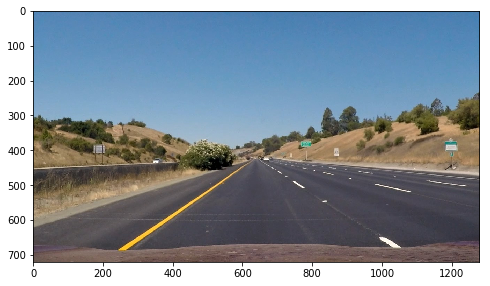

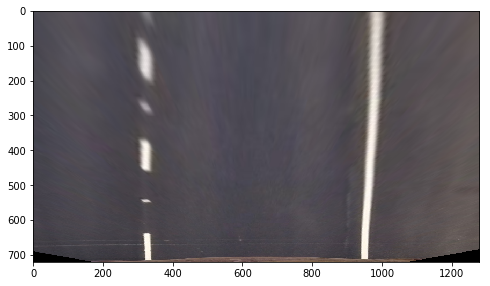

In [238]:
def drawPerspectiveLines(img, color=[255, 0, 0], thickness=3):
    ### draw lines between points for perspective transform
    cv2.line(img, (leftBtX, leftBtY),(leftTpX, leftTpY), color, thickness)
    cv2.line(img, (leftTpX, leftTpY),(rightTpX, rightTpY), color, thickness)
    cv2.line(img, (rightTpX, rightTpY),(rightBtX, rightBtY), color, thickness)
    cv2.line(img, (rightBtX, rightBtY),(leftBtX, leftBtY), color, thickness)
    
def transPerspective(img):
    ### apply perspective transform
    # get image size
    img_size = (img.shape[1],img.shape[0])
    
    # compute perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # create warped image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

def transPerspectiveBack(warped, img_size):
    ### apply perspective transform back        
    
    # compute perspective transform
    M = cv2.getPerspectiveTransform(dst, src)
    
    # create warped image
    img = cv2.warpPerspective(warped, M, img_size, flags=cv2.INTER_LINEAR)
    return img
    

straitLineImg1 = mpimg.imread('test_images/straight_lines1.jpg')
straitLineImg2 = mpimg.imread('test_images/straight_lines2.jpg')

showImg(straitLineImg1)

#drawPerspectiveLines(straitLineImg1)
#drawPerspectiveLines(straitLineImg2)

straitLineImgPersp1 = transPerspective(straitLineImg1)
straitLineImgPersp2 = transPerspective(straitLineImg2)



straitLineImgPersp_1 = transPerspective(cv2.undistort(straitLineImg1, mtx, dist, None, mtx))
straitLineImgPersp_2 = transPerspective(cv2.undistort(straitLineImg2, mtx, dist, None, mtx))

#showImg(straitLineImgPersp1)
#showImg(straitLineImgPersp_1)
#showImg(straitLineImgPersp2)
showImg(straitLineImgPersp_2)

In [239]:
def getLaneWidths(leftPoly, rightPoly):
    ### return lane widths in pixels at top and bottom of image
    
    ytop = 0
    ybottom = LaneInfo.img_shape[0]-1
    
    leftTop = leftPoly[0]*ytop**2 + leftPoly[1]*ytop + leftPoly[2]
    rightTop = rightPoly[0]*ytop**2 + rightPoly[1]*ytop + rightPoly[2]
    
    leftBottom = leftPoly[0]*ybottom**2 + leftPoly[1]*ybottom + leftPoly[2]
    rightBottom = rightPoly[0]*ybottom**2 + rightPoly[1]*ybottom + rightPoly[2]
    
    return rightTop - leftTop, rightBottom - leftBottom

In [240]:
def sanityCheck():
    ### checks LeftLane and RightLane parameters to figure out whether or not the founded lines are acceptable
        
    topWidth, bottomWidth = getLaneWidths(LaneInfo.LeftLine.current_fit, LaneInfo.RightLine.current_fit)
    
    LaneInfo.widthDiffer = 100*(abs(topWidth-bottomWidth)/max(topWidth,bottomWidth))
    
    # the width of the lane on the top and the bottom of image should be almost similar
    # the differnce more than LaneInfo.widthDifferThreshold is not acceptable
    if(LaneInfo.widthDiffer > LaneInfo.widthDifferThreshold):
        return False
    
    return True

In [241]:
def evaluateLaneLines(leftx, lefty, rightx, righty):
    # evaluation of detected line
    
    LaneInfo.LeftLine.allx = leftx
    LaneInfo.LeftLine.ally = lefty
    
    # detected line pixels
    LaneInfo.RightLine.allx = rightx
    LaneInfo.RightLine.ally = righty
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    LaneInfo.LeftLine.current_fit = left_fit
    LaneInfo.RightLine.current_fit = right_fit
    
    # sanity check
    if(sanityCheck()):
        LaneInfo.process()
    else:
        LaneInfo.recoverFromPast()
    
    # calculate curvature
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/640 # meters per pixel in x dimension    
    
    y_eval = LaneInfo.img_shape[0]-1

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    
    # calculating offset
    # we need left line botoom and right line bottom x coordinates
    leftBase = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    rightBase = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    offsetPixel = (leftBase + rightBase)/2 - (LaneInfo.img_shape[1])/2
    
    LaneInfo.offset = offsetPixel*xm_per_pix
    
    LaneInfo.LeftLine.radius_of_curvature = left_curverad
    LaneInfo.RightLine.radius_of_curvature = right_curverad

In [242]:
def getDetectedLaneImages(warped_image):
    # finding lane line on warped image
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, LaneInfo.img_shape[0]-1, LaneInfo.img_shape[0] )
    left_fitx = LaneInfo.LeftLine.current_fit[0]*ploty**2 + LaneInfo.LeftLine.current_fit[1]*ploty + LaneInfo.LeftLine.current_fit[2]
    right_fitx = LaneInfo.RightLine.current_fit[0]*ploty**2 + LaneInfo.RightLine.current_fit[1]*ploty + LaneInfo.RightLine.current_fit[2]
    
    # filling detected lane so it will be green
    lanePolyLeft = np.dstack((left_fitx, ploty))
    lanePolyRight = np.dstack((right_fitx, ploty))
    lanePoly = np.concatenate((lanePolyLeft, lanePolyRight[:,::-1,:]), axis = 1)    
    lane_img = np.zeros(LaneInfo.img_shape, dtype=np.uint8)
    cv2.fillPoly(lane_img, np.int_([lanePoly]), (0,255, 0))
    
    poly_img = np.zeros(LaneInfo.img_shape, dtype=np.uint8)
    cv2.fillPoly(poly_img, np.int_([lanePoly]), (0,255, 0))
    
    poly_img = cv2.addWeighted(np.dstack((warped_image, warped_image, warped_image))*255, 1, poly_img, 0.3, 0)
    
    #if(initial_image is not None):
    #    img = transPerspective(initial_image)
    #    result = cv2.addWeighted(img, 1, lane_img, 0.3, 0)
    #    showImg(lane_img)
    
    # drawing detected left and right points
    left_line_img = np.zeros(LaneInfo.img_shape, dtype=np.uint8)
    right_line_img = np.zeros(LaneInfo.img_shape, dtype=np.uint8)
    left_line_img[LaneInfo.LeftLine.ally, LaneInfo.LeftLine.allx] = [255, 0, 0]
    right_line_img[LaneInfo.RightLine.ally, LaneInfo.RightLine.allx] = [0, 0, 255]
    
    # uwarp detected points and lane
    img_size = (LaneInfo.img_shape[1], LaneInfo.img_shape[0])
    
    left_line_img = transPerspectiveBack(left_line_img, img_size)
    right_line_img = transPerspectiveBack(right_line_img, img_size)
    lane_img = transPerspectiveBack(lane_img, img_size)
    
    return left_line_img, right_line_img, lane_img, poly_img

In [243]:
def detectLane(binary_warped):
    
    if((LaneInfo.LeftLine.current_fit is None) or (LaneInfo.RightLine.current_fit is None)):
    
        # Assuming you have created a warped binary image called "binary_warped"
        # Take a histogram of the bottom half of the image
        histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
        # Create an output image to draw on and  visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            #cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            #cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    
    else:
        ################################################################################
                
        # Assume you now have a new warped binary image 
        # from the next frame of video (also called "binary_warped")
        # It's now much easier to find line pixels!
        
        left_fit = LaneInfo.LeftLine.current_fit
        right_fit = LaneInfo.RightLine.current_fit
        
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 100
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))          

    ################################################################################
    
    ###### Updating left and right lines information
    
    # extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    evaluateLaneLines(leftx, lefty, rightx, righty)    

In [244]:
#import datetime as dt

def pipeline(initial_image, fileName=None):
    ### pipeline that exposes lane on image    
    
    # undistorting the image
    initial_image = cv2.undistort(initial_image, mtx, dist, None, mtx)
    
    gradx = abs_sobel_thresh(initial_image, orient='x', sobel_kernel=3, thresh=(20, 100), channel='gray')    
    mag_binary = mag_thresh(initial_image, sobel_kernel=3, mag_thresh=(30, 255), channel='l')
    color = color_threshold(initial_image, thresh = (140, 255), channel='gray')
    color1 = color_threshold(initial_image, thresh = (140, 255), channel='s')
    dir_thresh = dir_threshold(initial_image, sobel_kernel=3, thresh=(0.7, 1.3))
    
    combined = np.zeros_like(gradx)
    combined[(((gradx == 1) | ((color == 1) & (color1 == 1))) )] = 1
    
    combined = transPerspective(combined)
    
    
    # finding lane line on warped image
    detectLane(combined)    
    left_line_img, right_line_img, window_img, poly_img = getDetectedLaneImages(combined)    

    # add detected point and lane to an original image
    result = cv2.addWeighted(initial_image, 1, left_line_img, 2, 0)
    result = cv2.addWeighted(result, 1, right_line_img, 2, 0)
    result = cv2.addWeighted(result, 1, window_img, 0.3, 0)   
    
    # add curvateure size to the image    
    cv2.putText(result, "left curvature = {:.0f} m".format(LaneInfo.LeftLine.radius_of_curvature), (50, 50), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 1)
    cv2.putText(result, "right curvature = {:.0f} m".format(LaneInfo.RightLine.radius_of_curvature), (50, 100), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 1)
    cv2.putText(result, "offset = {:.2f} m".format(LaneInfo.offset), (50, 150), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 1)    
    cv2.putText(result, "width differ = {:.2f} %".format(LaneInfo.widthDiffer), (50, 200), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 1)        
    
    # show detection info
    if(not LaneInfo.detected):
        cv2.putText(result, "Not detected".format(LaneInfo.widthDiffer), (50, 600), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,0,0), 1)        

    # put small warped image to big one
    smallImgShape = (int(IMAGE_SHAPE[0]/3), int(IMAGE_SHAPE[1]/3))
    poly_img = cv2.resize(poly_img, (smallImgShape[1], smallImgShape[0]))
    
    result[50:50+smallImgShape[0], 804:804+smallImgShape[1]] = poly_img
    
    return result

def process_image(image):
    ### image process function for video
    
    result = pipeline(image)
    
    # converting to 3 channel image for video
    if(len(result.shape) == 2):
        result = result[:,:,None]
        result = np.uint8(result*[1,1,1])
        result = np.uint8(255*result/np.max(result))        
    
    return result;

In [245]:
# setting points for perspective transform

#leftBtX = 205
#leftBtY = 720

#leftTpX = 595 
#leftTpY = 450

#rightTpX = 685 
#rightTpY = 450

#rightBtX = 1125
#rightBtY = 720

#src = np.float32(
#        [[leftBtX,leftBtY],
#         [leftTpX,leftTpY],
#         [rightTpX,rightTpY],
#         [rightBtX,rightBtY]])

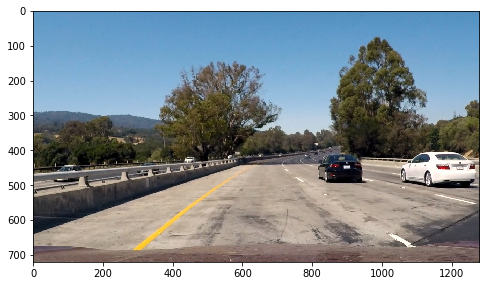

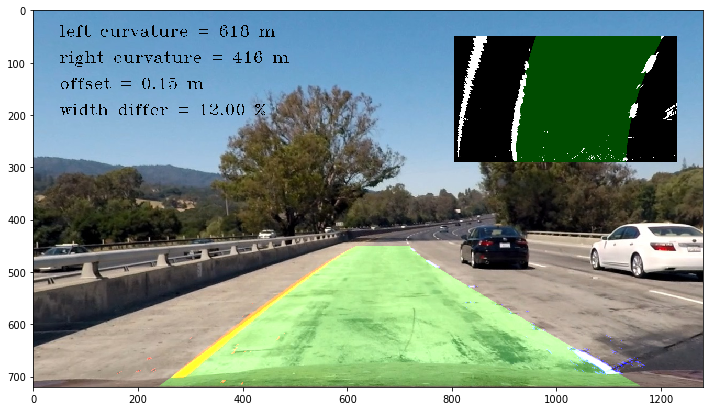

In [246]:
LaneInfo = Lane(IMAGE_SHAPE)
sampleImgFile = 'test_images/test1.jpg'

img = mpimg.imread(sampleImgFile)
showImg(img)

#img2 = transPerspective(cv2.undistort(img, mtx, dist, None, mtx))
#showImg(img2)

img1 = pipeline(img)
showImg(img1, figsize=(12,21), map='gray')

#sampleImgFile = 'images/084907.836401.jpg'
#sampleImgFile = 'test_images/straight_lines1.jpg'

#img = mpimg.imread(sampleImgFile)
#showImg(img, figsize=(8,14))

#img1 = pipeline(img)
#showImg(img1, figsize=(12,21), map='gray')

In [247]:
#left_line_img, right_line_img, window_img = detectLane(img1)

#print(left_line_pts.shape)

#img_size = (img.shape[1],img.shape[0])
#left_line_img = transPerspectiveBack(left_line_img, img_size)
#right_line_img = transPerspectiveBack(right_line_img, img_size)
#window_img = transPerspectiveBack(window_img, img_size)

#result = cv2.addWeighted(img, 1, left_line_img, 2, 0)
#result = cv2.addWeighted(result, 1, right_line_img, 2, 0)
#result = cv2.addWeighted(result, 1, window_img, 0.3, 0)

#showImg(result, figsize=(12,21))
#print((left_line_pts[left_line_pts>0]))

In [248]:
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def processVideo(videoFile, videoFileOut=None):
    ### video of processed image
    
    videoIn = videoFile    
    
    if(videoFileOut is None):
        name, ext = os.path.splitext(videoIn)
        videoOut = name + '_out' + ext
    else:
        videoOut = videoFileOut
    
    clip = VideoFileClip(videoIn)
    clipProcessed = clip.fl_image(process_image)
    clipProcessed.write_videofile(videoOut, audio=False)
    return videoOut

In [249]:
# resetting the lane info
LaneInfo = Lane(IMAGE_SHAPE)

videoFileName = 'project_video.mp4'
ouputVideo = processVideo('project_video.mp4')

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [06:15<00:00,  3.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 



In [250]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(ouputVideo))

In [ ]:
    ### solution 1
    gradx = abs_sobel_thresh(initial_image, orient='x', sobel_kernel=3, thresh=(20, 100), channel='gray')    
    mag_binary = mag_thresh(initial_image, sobel_kernel=3, mag_thresh=(30, 255), channel='l')
    color = color_threshold(initial_image, thresh = (140, 255), channel='gray')
    color1 = color_threshold(initial_image, thresh = (140, 255), channel='s')
    dir_thresh = dir_threshold(initial_image, sobel_kernel=3, thresh=(0.7, 1.3))
    
    combined = np.zeros_like(gradx)
    combined[(((gradx == 1) | ((color == 1) & (color1 == 1))) )] = 1
    
    
    
    